In [2]:
from copy import deepcopy

import numpy as np

import paramfile

import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline

import atomman.unitconvert as uc

import potgen

from pathlib import Path

In [3]:
root = Path('C:/Users/lmh1/Documents/website/IPR-website/potentials/Download/2004--Mishin-Y--Ni-Al')

In [4]:
eam = potgen.EAMsetfl(Path(root, '2/NiAl.eam.alloy'))

10000 0.000699510351340587 10000 0.000672488399972482 6.72488399972482
70008
2 3 70000


## $F(\rho)$

In [5]:
F_Al_plt = Path(root, '1/F_al.plt')

with open(F_Al_plt) as f:
    lines = f.readlines()
ρvals = [0.0]
Fvals = [0.0]
for i in range(2, len(lines)):
    terms = lines[i].strip().split()
    ρvals.append(float(terms[0].replace('D', 'E')))
    Fvals.append(float(terms[1].replace('D', 'E')))
F_Al_spline = CubicSpline(ρvals, Fvals)

def F_Al(ρ):
    return F_Al_spline(ρ)

F_Ni_plt = Path(root, '1/F_ni.plt')
with open(F_Ni_plt) as f:
    lines = f.readlines()
ρvals = [0.0]
Fvals = [0.0]
for i in range(2, len(lines)):
    terms = lines[i].strip().split()
    ρvals.append(float(terms[0].replace('D', 'E')))
    Fvals.append(float(terms[1].replace('D', 'E')))
F_Ni_spline = CubicSpline(ρvals, Fvals)

def F_Ni(ρ):
    
    ρc = 5.94753804202404
    ρmax = F_Ni_spline(ρc)
    return np.piecewise(ρ, [ρ < ρc, ρ >= ρc], [F_Ni_spline, ρmax])
    
    return F_Ni_spline(ρ)

In [6]:
def neg_spline(ρ):
    return -1 * F_Ni_spline(ρ)

In [7]:
from scipy.optimize import minimize_scalar

In [8]:
r=minimize_scalar(neg_spline, bracket=(5.5, 6.0, 6.5), options={'xtol': 1.48e-12})

In [9]:
r

     fun: -36.18619932029369
    nfev: 28
     nit: 24
 success: True
       x: 5.94753804202404

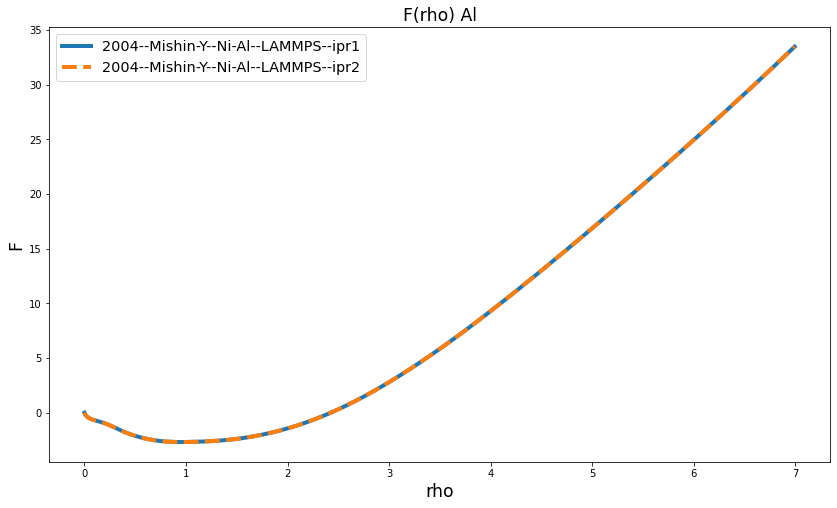

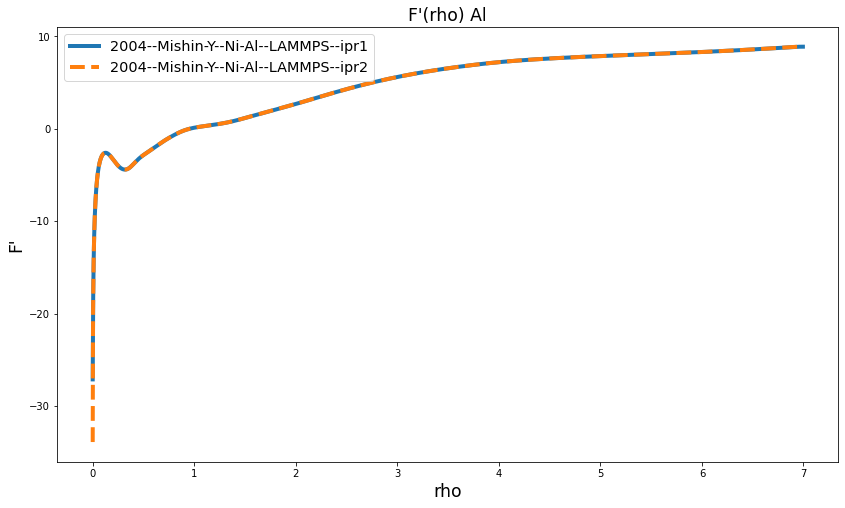

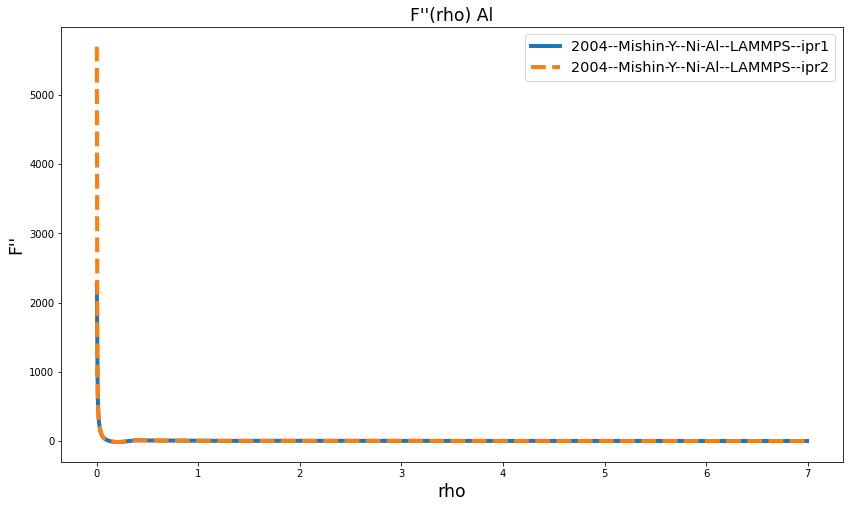

In [17]:
x1 = x2 = eam.rhovalues()
y1 = eam.embedvalues('Al')
y2 = F_Al(eam.rhovalues())

plt.figure(figsize=(14,8))
plt.title('F(rho) Al', size='xx-large')
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('rho', size='xx-large')
plt.ylabel('F', size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title("F'(rho) Al", size='xx-large')
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('rho', size='xx-large')
plt.ylabel("F'", size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title("F''(rho) Al", size='xx-large')
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('rho', size='xx-large')
plt.ylabel("F''", size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

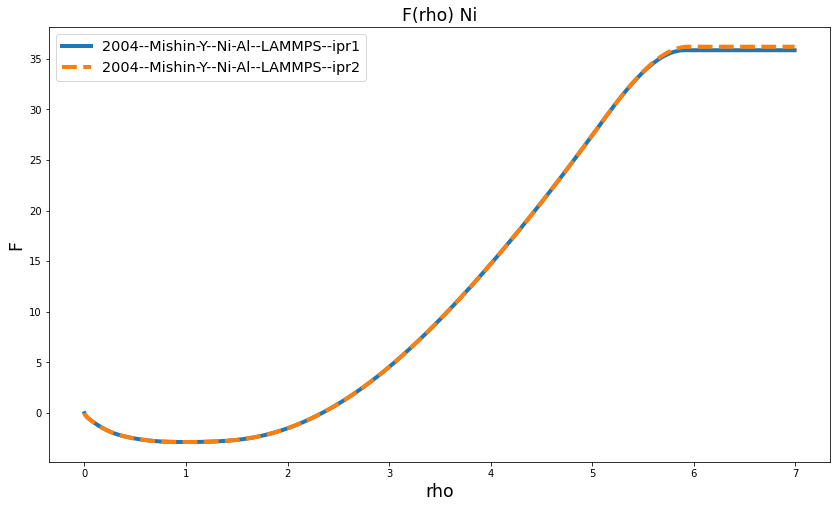

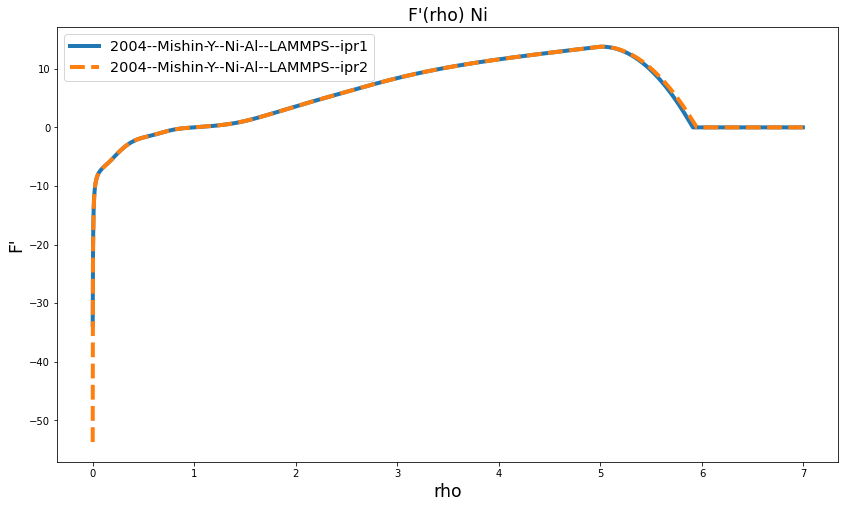

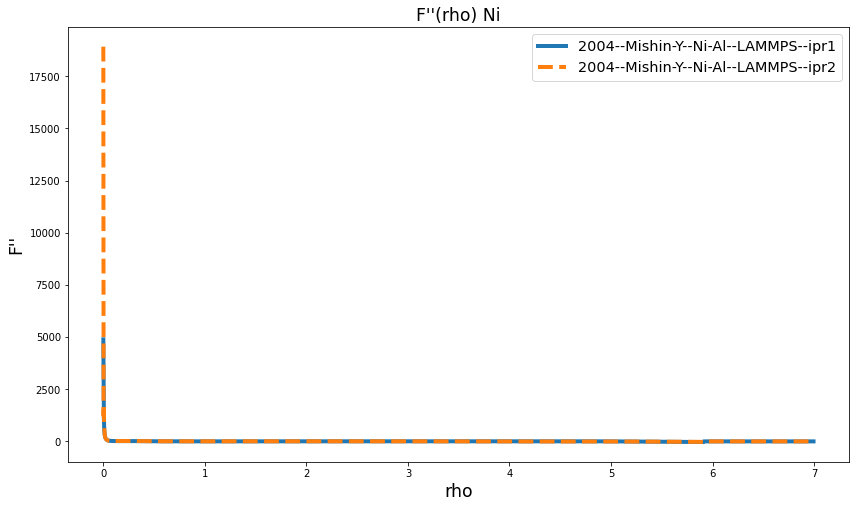

In [18]:
x1 = x2 = eam.rhovalues()
y1 = eam.embedvalues('Ni')
y2 = F_Ni(eam.rhovalues())

plt.figure(figsize=(14,8))
plt.title('F(rho) Ni', size='xx-large')
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('rho', size='xx-large')
plt.ylabel('F', size='xx-large')
plt.legend(fontsize='x-large')

plt.figure(figsize=(14,8))
plt.title("F'(rho) Ni", size='xx-large')
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('rho', size='xx-large')
plt.ylabel("F'", size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title("F''(rho) Ni", size='xx-large')
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('rho', size='xx-large')
plt.ylabel("F''", size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

# $\rho(r)$

In [20]:
ρ_Al_plt = Path(root, '1/fal.plt')

with open(ρ_Al_plt) as f:
    lines = f.readlines()
rvals = []
ρvals = []
for i in range(2, len(lines)):
    terms = lines[i].strip().split()
    rvals.append(float(terms[0].replace('D', 'E')))
    ρvals.append(float(terms[1].replace('D', 'E')))
ρvals[-1] = 0.0
rc_Al = rvals[-1]
ρ_Al_spline = CubicSpline(rvals, ρvals)

def ρ_Al(r):
    return np.piecewise(r, [r < rc_Al, r >= rc_Al], [ρ_Al_spline, 0.0])

ρ_Ni_plt = Path(root, '1/fni.plt')
with open(ρ_Ni_plt) as f:
    lines = f.readlines()
rvals = []
ρvals = []
for i in range(2, len(lines)):
    terms = lines[i].strip().split()
    rvals.append(float(terms[0].replace('D', 'E')))
    ρvals.append(float(terms[1].replace('D', 'E')))
ρvals[-1] = 0.0
rc_Ni = rvals[-1]
ρ_Ni_spline = CubicSpline(rvals, ρvals)

def ρ_Ni(r):
    return np.piecewise(r, [r < rc_Ni, r >= rc_Ni], [ρ_Ni_spline, 0.0])

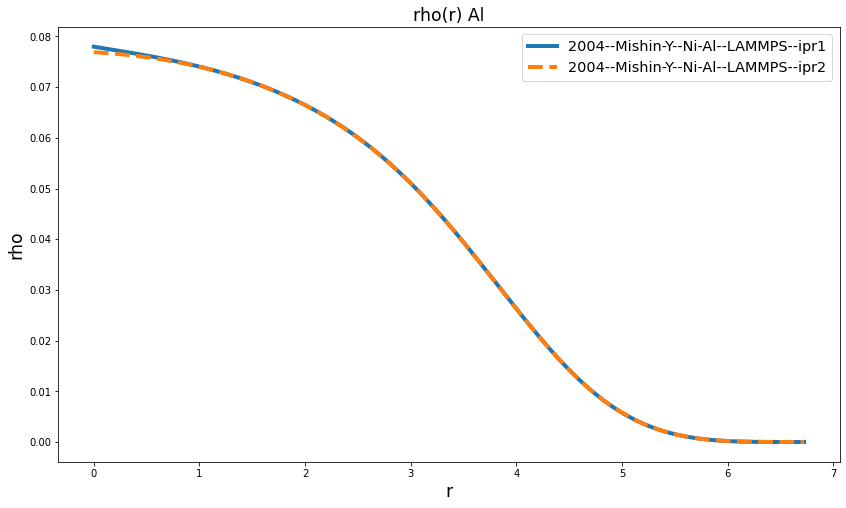

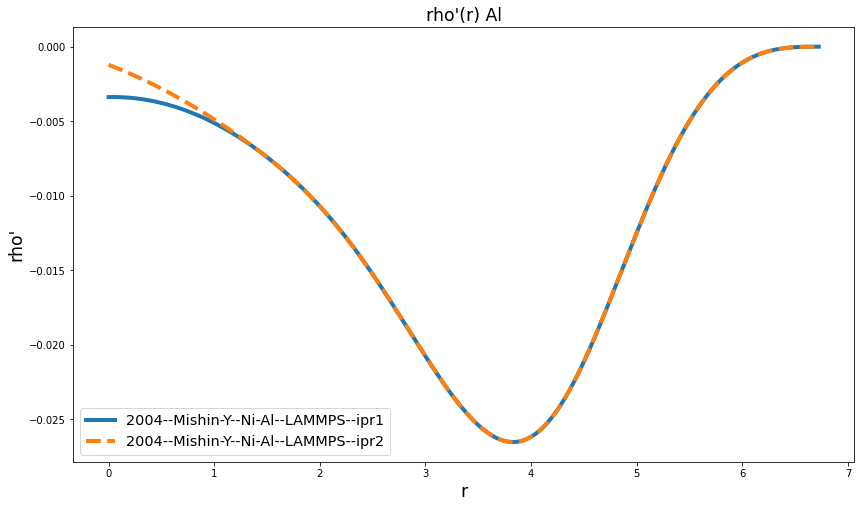

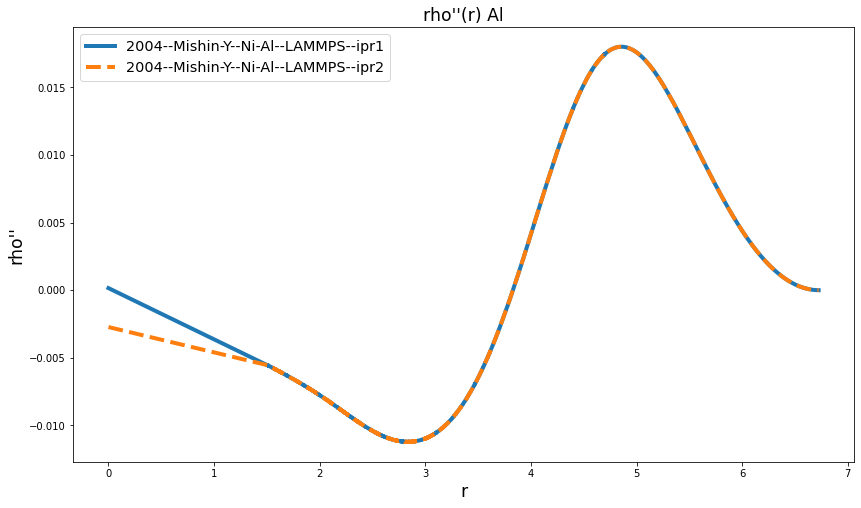

In [21]:
x1 = x2 = eam.rvalues()
y1 = eam.densityvalues('Al')
y2 = ρ_Al(eam.rvalues())

plt.figure(figsize=(14,8))
plt.title('rho(r) Al', size='xx-large')
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('r', size='xx-large')
plt.ylabel('rho', size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title("rho'(r) Al", size='xx-large')
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('r', size='xx-large')
plt.ylabel("rho'", size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title("rho''(r) Al", size='xx-large')
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('r', size='xx-large')
plt.ylabel("rho''", size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

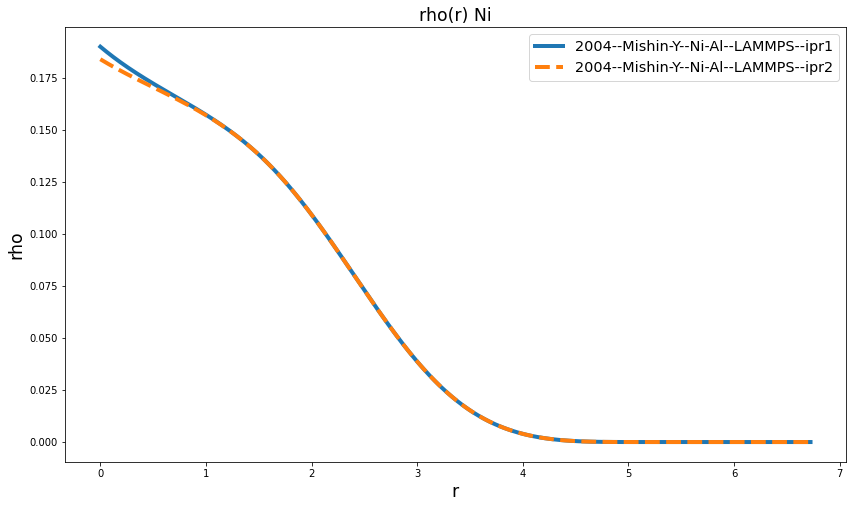

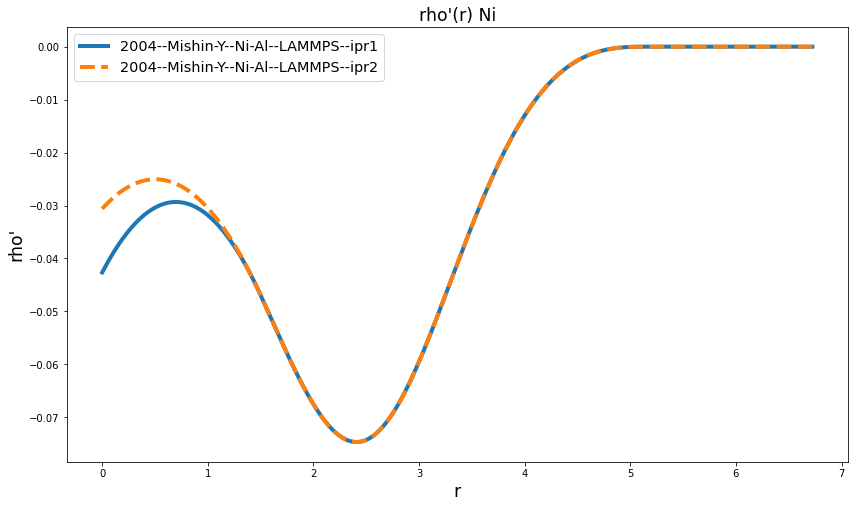

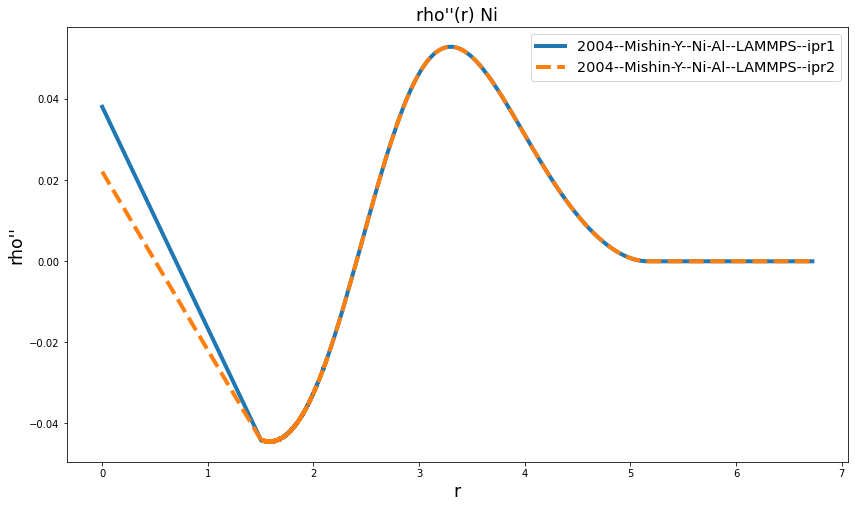

In [22]:
x1 = x2 = eam.rvalues()
y1 = eam.densityvalues('Ni')
y2 = ρ_Ni(eam.rvalues())

plt.figure(figsize=(14,8))
plt.title('rho(r) Ni', size='xx-large')
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('r', size='xx-large')
plt.ylabel('rho', size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title("rho'(r) Ni", size='xx-large')
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('r', size='xx-large')
plt.ylabel("rho'", size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title("rho''(r) Ni", size='xx-large')
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr1')
plt.plot(x2, y2, '--', lw=4, label='2004--Mishin-Y--Ni-Al--LAMMPS--ipr2')
plt.xlabel('r', size='xx-large')
plt.ylabel("rho''", size='xx-large')
plt.legend(fontsize='x-large')
plt.show()

# $\phi(r)$

In [71]:
ϕ_Al_plt = Path(root, '1/pal.plt')

with open(ϕ_Al_plt) as f:
    lines = f.readlines()
rvals = []
ϕvals = []
for i in range(2, len(lines)):
    terms = lines[i].strip().split()
    rvals.append(float(terms[0].replace('D', 'E')))
    ϕvals.append(float(terms[1].replace('D', 'E')))
ϕvals[-1] = 0.0
rc_Al = rvals[-1]
ϕ_Al_spline = CubicSpline(rvals, ϕvals)

def ϕ_Al(r):
    return np.piecewise(r, [r < rc_Al, r >= rc_Al], [ϕ_Al_spline, 0.0])

ϕ_Ni_plt = Path(root, '1/pni.plt')
with open(ϕ_Ni_plt) as f:
    lines = f.readlines()
rvals = []
ϕvals = []
for i in range(2, len(lines)):
    terms = lines[i].strip().split()
    rvals.append(float(terms[0].replace('D', 'E')))
    ϕvals.append(float(terms[1].replace('D', 'E')))
ϕvals[-1] = 0.0
rc_Ni = rvals[-1]
ϕ_Ni_spline = CubicSpline(rvals, ϕvals)

def ϕ_Ni(r):
    return np.piecewise(r, [r < rc_Ni, r >= rc_Ni], [ϕ_Ni_spline, 0.0])

ϕ_NiAl_plt = Path(root, '1/pnial.plt')
with open(ϕ_NiAl_plt) as f:
    lines = f.readlines()
rvals = []
ϕvals = []
for i in range(2, len(lines)):
    terms = lines[i].strip().split()
    rvals.append(float(terms[0].replace('D', 'E')))
    ϕvals.append(float(terms[1].replace('D', 'E')))
ϕvals[-1] = 0.0
ϕ_NiAl_spline = CubicSpline(rvals, ϕvals)
rc_NiAl = rvals[-1]

def ϕ_NiAl(r):
    return np.piecewise(r, [r < rc_NiAl, r >= rc_NiAl], [ϕ_NiAl_spline, 0.0])

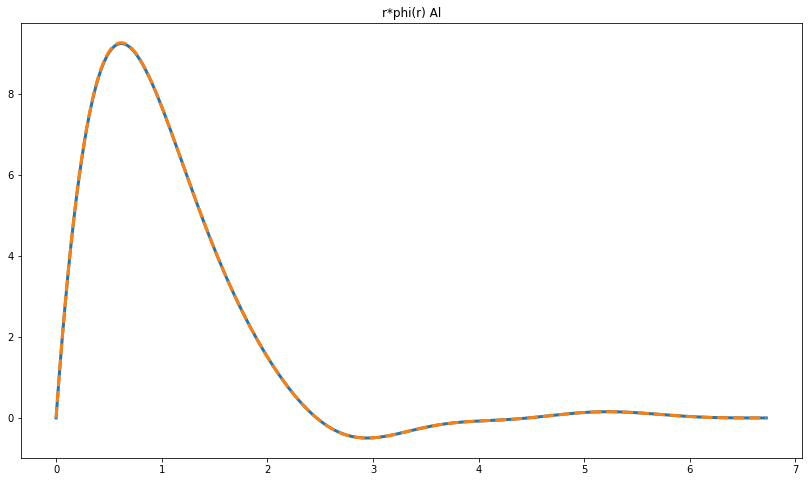

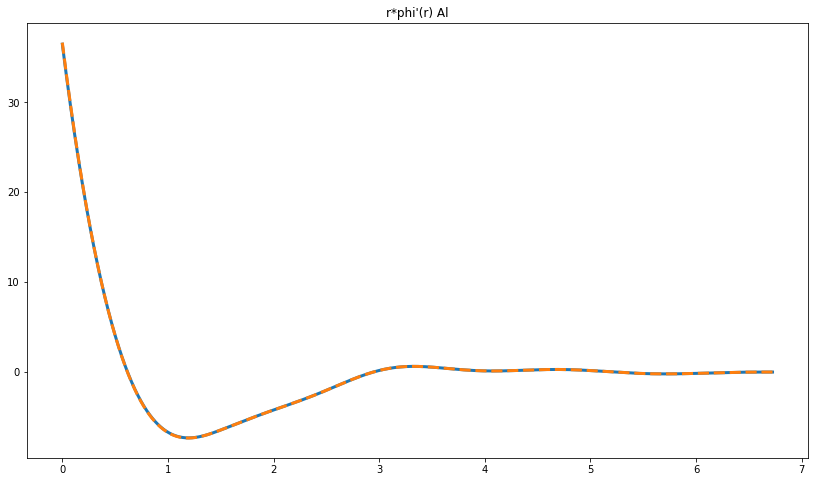

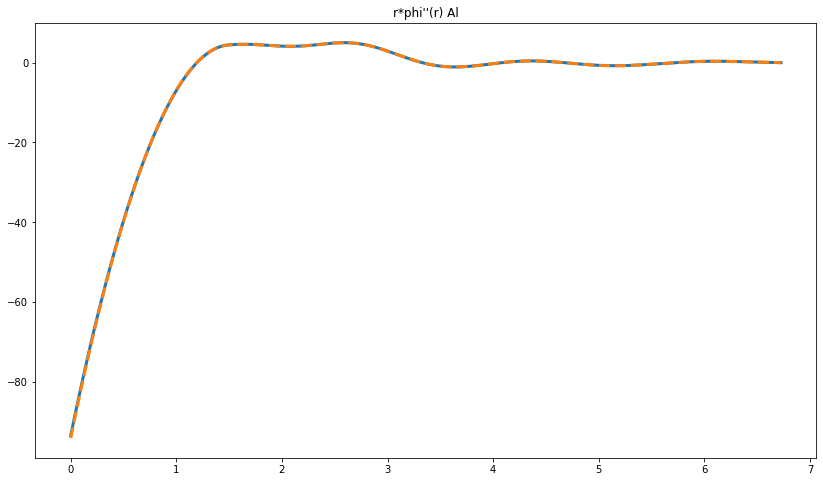

In [118]:
x1 = x2 = eam.rvalues()
y1 = eam.pairvalues(['Al', 'Al'])
y2 = eam.rvalues()*ϕ_Al(eam.rvalues())

plt.figure(figsize=(14,8))
plt.title('r*phi(r) Al')
plt.plot(x1, y1, lw=3, label='')
plt.plot(x2, y2, '--', lw=3)
plt.show()

plt.figure(figsize=(14,8))
plt.title("r*phi'(r) Al")
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, '--', lw=3)
plt.show()

plt.figure(figsize=(14,8))
plt.title("r*phi''(r) Al")
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, '--', lw=3)
plt.show()

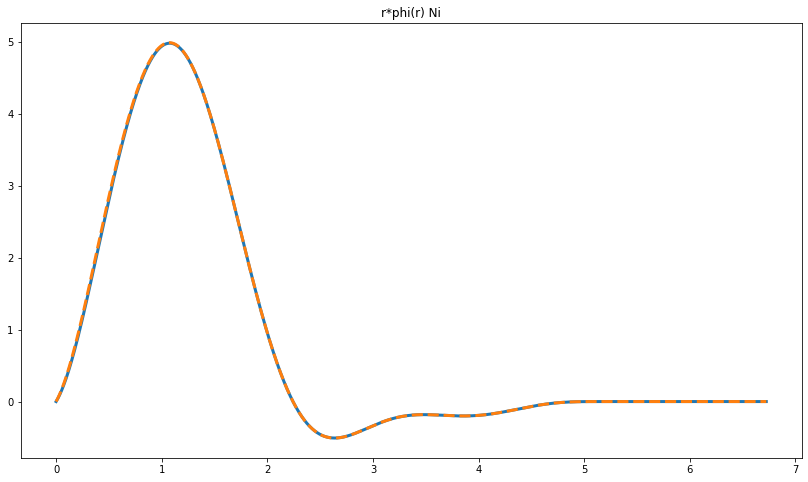

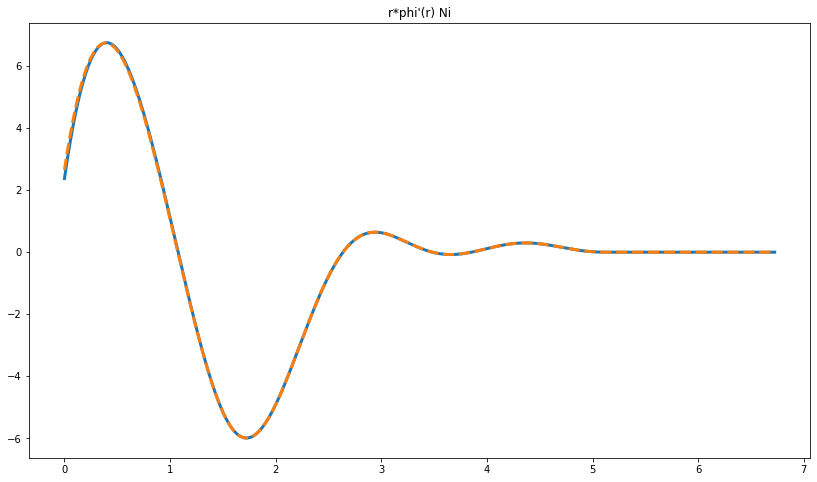

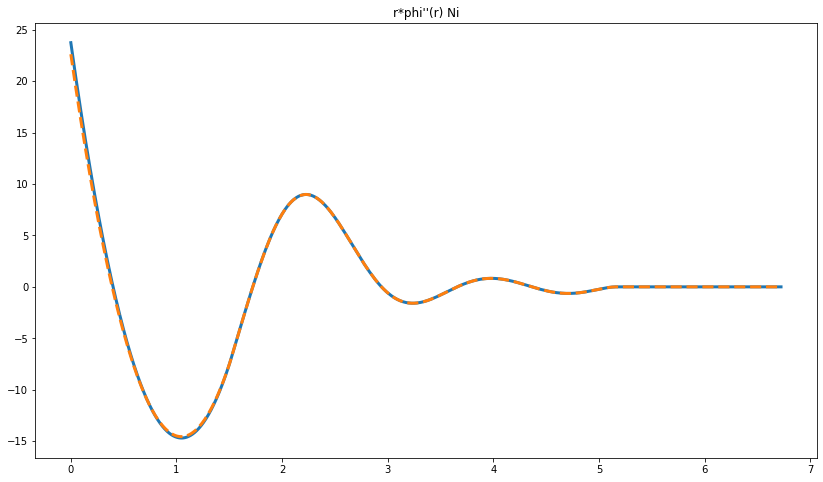

In [120]:
x1 = x2 = eam.rvalues()
y1 = eam.pairvalues(['Ni', 'Ni'])
y2 = eam.rvalues()*ϕ_Ni(eam.rvalues())

plt.figure(figsize=(14,8))
plt.title('r*phi(r) Ni')
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, '--', lw=3)
plt.show()

plt.figure(figsize=(14,8))
plt.title("r*phi'(r) Ni")
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, '--', lw=3)
plt.show()

plt.figure(figsize=(14,8))
plt.title("r*phi''(r) Ni")
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, '--', lw=3)
plt.show()

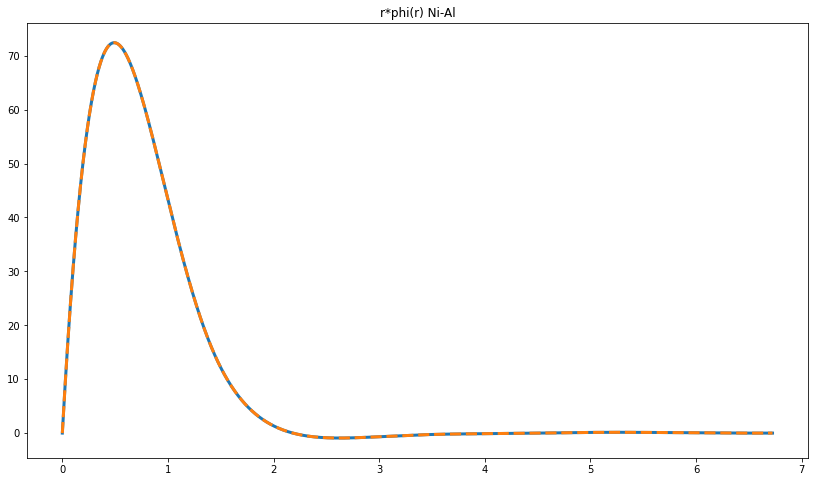

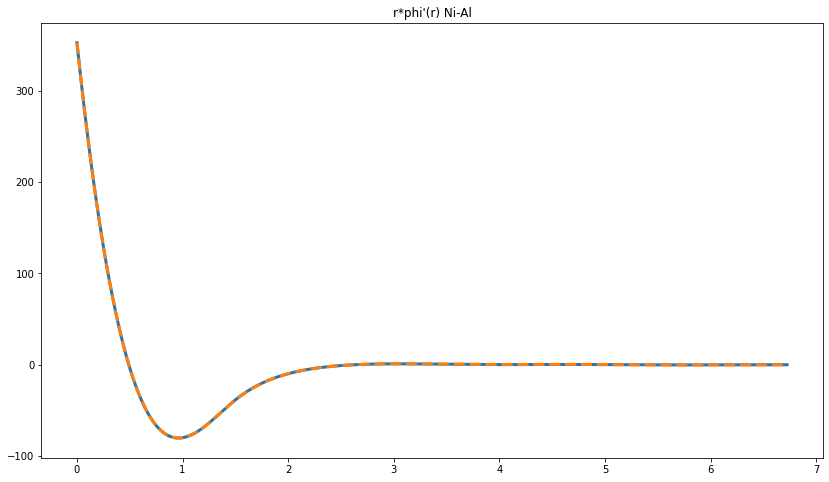

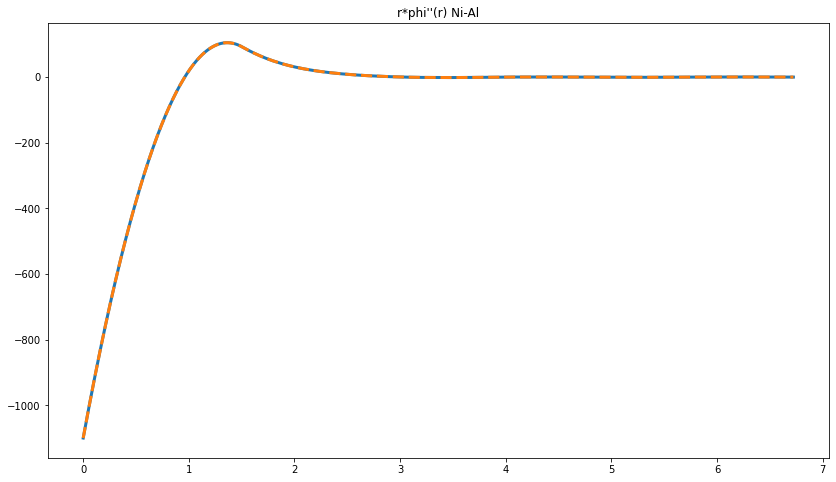

In [121]:
x1 = x2 = eam.rvalues()
y1 = eam.pairvalues(['Ni', 'Al'])
y2 = eam.rvalues()*ϕ_NiAl(eam.rvalues())

plt.figure(figsize=(14,8))
plt.title('r*phi(r) Ni-Al')
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, '--', lw=3)
plt.show()

plt.figure(figsize=(14,8))
plt.title("r*phi'(r) Ni-Al")
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, '--', lw=3)
plt.show()

plt.figure(figsize=(14,8))
plt.title("r*phi''(r) Ni-Al")
x1, y1 = potgen.tools.numderivative(x1, y1)
x2, y2 = potgen.tools.numderivative(x2, y2)
plt.plot(x1, y1, lw=3)
plt.plot(x2, y2, '--', lw=3)
plt.show()

## Build new potential file

In [122]:
numρ = numr = 10001
ρc = 6.99510351340587
rc = 6.72488399972482

ρ = np.linspace(0.0, ρc, numρ)
r = np.linspace(0.0, rc, numr)
xf='%26.17e '

In [147]:
content = "NiAl (L12) EAM from Y. Mishin, Acta Mat. 52, 1451-1467 (2004).\n"
content += "This is a reimplementation by Lucas Hale based on cubic spline interpolations of Yuri Mishin's plt files.\n"
content += "Specifically, this version explicitly sets F(0)=0 to ensure energies of isolated atoms are 0.0.\n"
content += '2 Ni Al\n'
content += f'{numρ} {ρ[1]} {numr} {r[1]} {r[-1]}\n'

# Ni tables

content += '28 58.71 3.52 fcc\n'

for i, Fval in enumerate(F_Ni(ρ)):
    content += xf % Fval
    if i % 5 == 4:
        content += '\n'
if i % 5 != 4:
    content += '\n'

for i, rhoval in enumerate(ρ_Ni(r)):
    content += xf % rhoval
    if i % 5 == 4:
        content += '\n'
if i % 5 != 4:
    content += '\n'

# Al tables
    
content += '13 26.982 4.05 fcc\n'

for i, Fval in enumerate(F_Al(ρ)):
    content += xf % Fval
    if i % 5 == 4:
        content += '\n'
if i % 5 != 4:
    content += '\n'

for i, rhoval in enumerate(ρ_Al(r)):
    content += xf % rhoval
    if i % 5 == 4:
        content += '\n'
if i % 5 != 4:
    content += '\n'

# Pair functions
    
for i, phival in enumerate(ϕ_Ni(r)):
    content += xf % (phival * r[i])
    if i % 5 == 4:
        content += '\n'
if i % 5 != 4:
    content += '\n'    
    
for i, phival in enumerate(ϕ_NiAl(r)):
    content += xf % (phival * r[i])
    if i % 5 == 4:
        content += '\n'
if i % 5 != 4:
    content += '\n'
    
for i, phival in enumerate(ϕ_Al(r)):
    content += xf % (phival * r[i])
    if i % 5 == 4:
        content += '\n'
if i % 5 != 4:
    content += '\n'
    
with open('2004--Mishin-Y--Ni-Al--LAMMPS--ipr2/NiAl_Mishin_2004.eam.alloy', 'w') as f:
    f.write(content)

In [148]:
eam2 = potgen.EAMsetfl('2004--Mishin-Y--Ni-Al--LAMMPS--ipr2/NiAl_Mishin_2004.eam.alloy')

10001 0.000699510351340587 10001 0.0006724883999724821 6.72488399972482
70015
2 3 70007


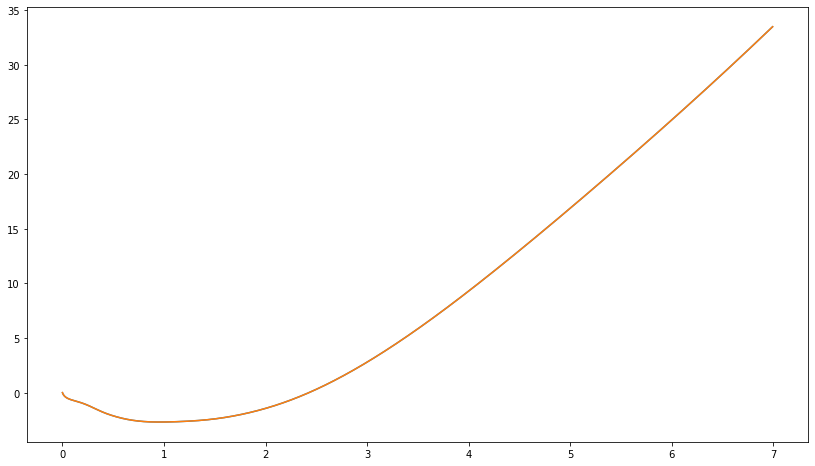

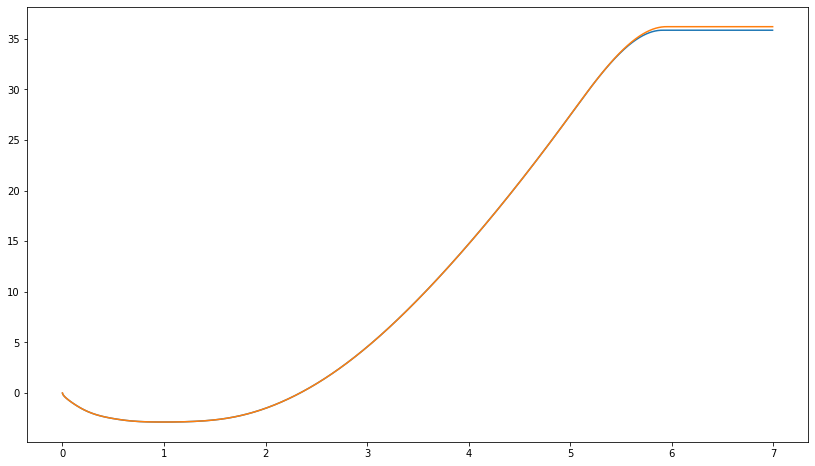

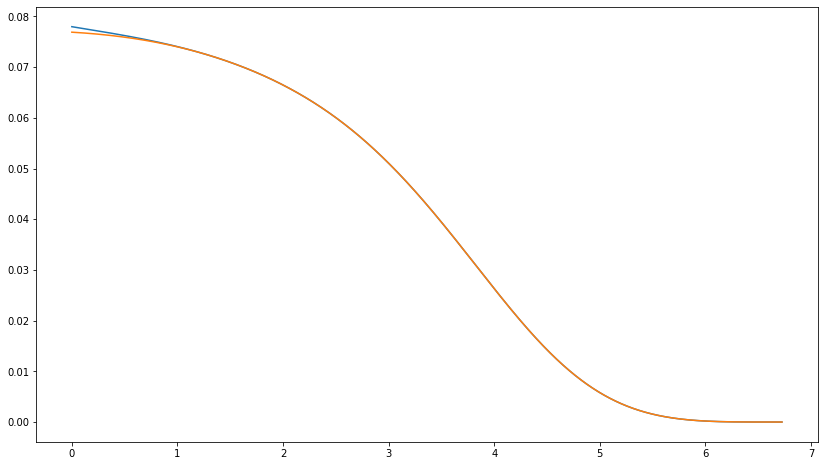

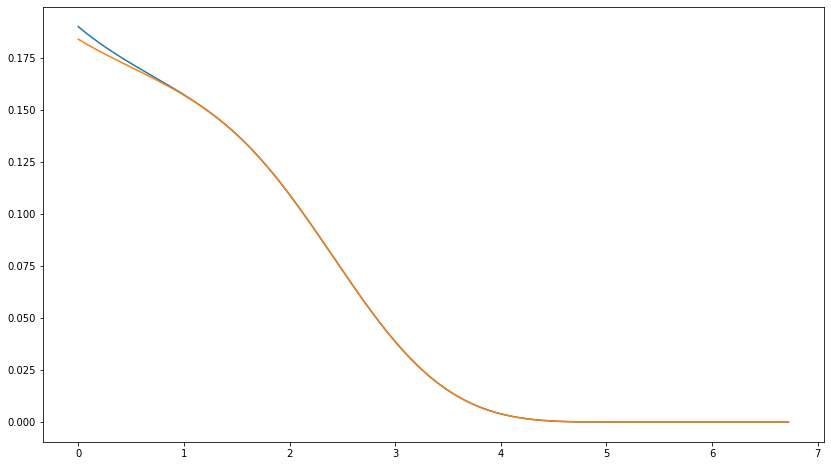

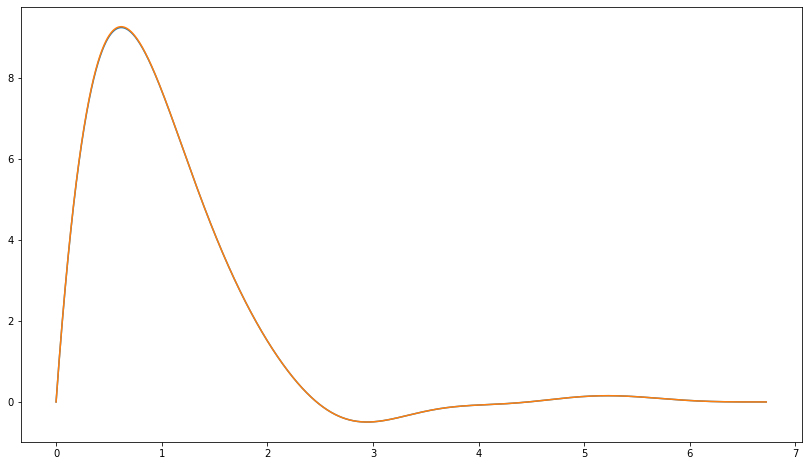

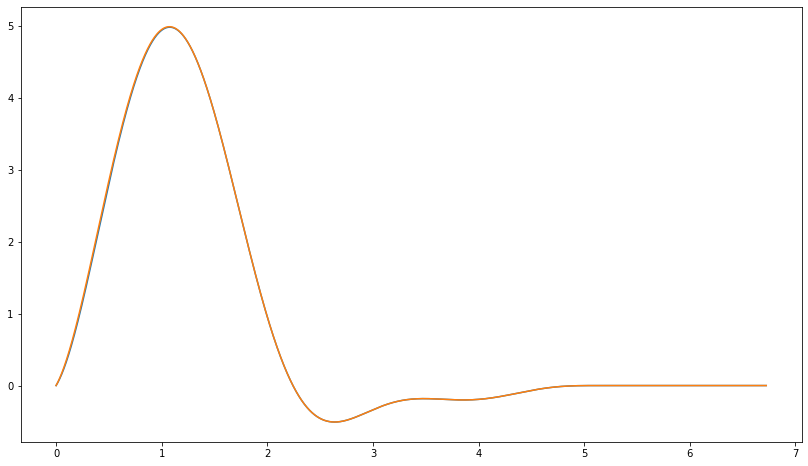

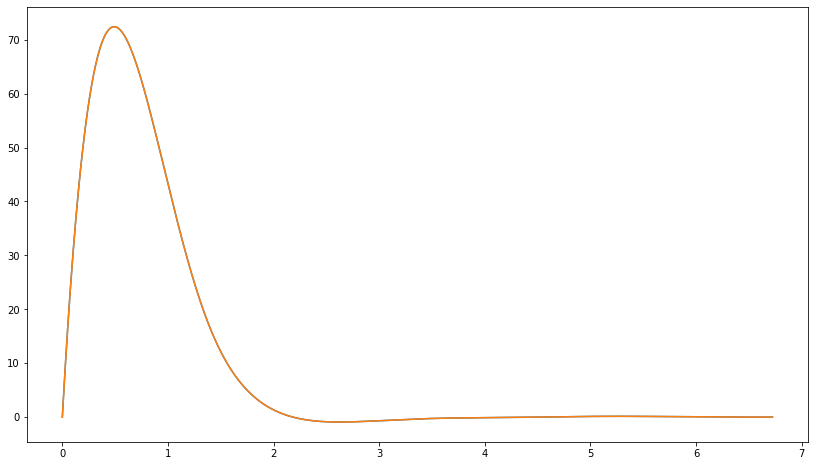

In [149]:
plt.figure(figsize=(14,8))
plt.plot(eam.rhovalues(), eam.embedvalues('Al'))
plt.plot(eam2.rhovalues(), eam2.embedvalues('Al'))
plt.show()

plt.figure(figsize=(14,8))
plt.plot(eam.rhovalues(), eam.embedvalues('Ni'))
plt.plot(eam2.rhovalues(), eam2.embedvalues('Ni'))
plt.show()

plt.figure(figsize=(14,8))
plt.plot(eam.rvalues(), eam.densityvalues('Al'))
plt.plot(eam2.rvalues(), eam2.densityvalues('Al'))
plt.show()

plt.figure(figsize=(14,8))
plt.plot(eam.rvalues(), eam.densityvalues('Ni'))
plt.plot(eam2.rvalues(), eam2.densityvalues('Ni'))
plt.show()

plt.figure(figsize=(14,8))
plt.plot(eam.rvalues(), eam.pairvalues(['Al', 'Al']))
plt.plot(eam2.rvalues(), eam2.pairvalues(['Al', 'Al']))
plt.show()

plt.figure(figsize=(14,8))
plt.plot(eam.rvalues(), eam.pairvalues(['Ni', 'Ni']))
plt.plot(eam2.rvalues(), eam2.pairvalues(['Ni', 'Ni']))
plt.show()

plt.figure(figsize=(14,8))
plt.plot(eam.rvalues(), eam.pairvalues(['Ni', 'Al']))
plt.plot(eam2.rvalues(), eam2.pairvalues(['Ni', 'Al']))
plt.show()

# Property comparisons

- '2004--Mishin-Y--Ni-Al--LAMMPS--ipr1' is the old version
- '2004--Mishin-Y--Ni-Al--LAMMPS--ipr2' is the new version

In [24]:
import iprPy

database = iprPy.load_database('master')

## Isolated atom energies

In [25]:
records_df = database.get_records_df(style='calculation_isolated_atom', potential_id='2004--Mishin-Y--Ni-Al')

In [26]:
records_df[['potential_LAMMPS_id', 'energy']].sort_values('potential_LAMMPS_id')

for i in records_df.sort_values('potential_LAMMPS_id').index:
    series = records_df.loc[i]
    print(series.potential_LAMMPS_id)
    for element in series.energy:
        print(element, series.energy[element])
    print()

2004--Mishin-Y--Ni-Al--LAMMPS--ipr1
Ni -0.022549650154092004
Al -0.0098690015330354

2004--Mishin-Y--Ni-Al--LAMMPS--ipr2
Ni 0.0
Al 0.0



## diatom energy scans

In [27]:
records_df = database.get_records_df(style='calculation_diatom_scan', potential_id='2004--Mishin-Y--Ni-Al')

In [28]:
def symbolstr(series):
    return '-'.join(series.symbols)
records_df['symbolstr'] = records_df.apply(symbolstr, axis=1)

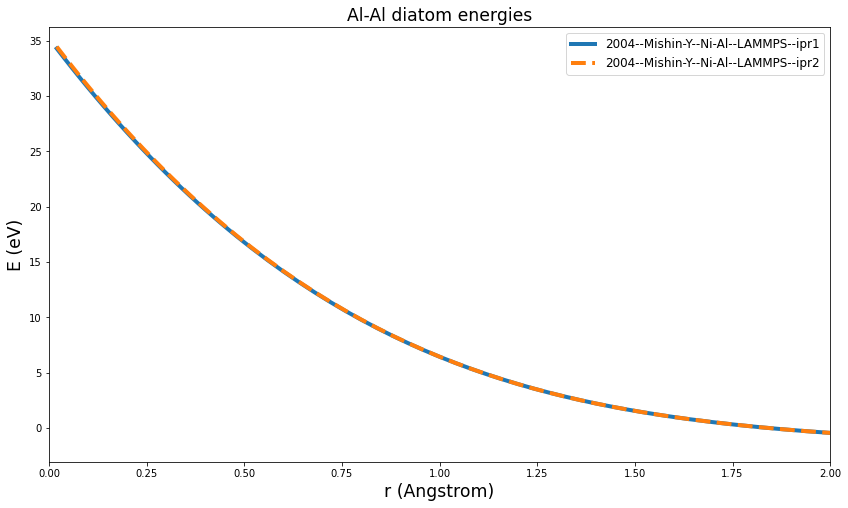

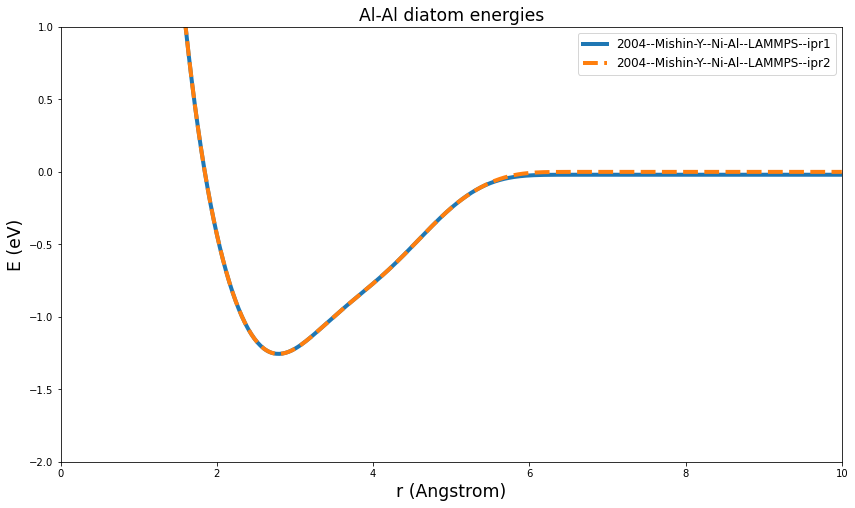

In [31]:
Al_df = records_df[records_df.symbolstr == 'Al'].sort_values('potential_LAMMPS_id')
assert len(Al_df) == 2


plt.figure(figsize=(14,8))
plt.title('Al-Al diatom energies', size='xx-large')
plt.plot(Al_df.iloc[0].diatom_plot.r, Al_df.iloc[0].diatom_plot.energy, lw=4,label=Al_df.iloc[0].potential_LAMMPS_id)
plt.plot(Al_df.iloc[1].diatom_plot.r, Al_df.iloc[1].diatom_plot.energy, '--', lw=4, label=Al_df.iloc[1].potential_LAMMPS_id)
plt.legend(fontsize='large')
plt.xlim(0, 2)
plt.xlabel('r (Angstrom)', size='xx-large')
plt.ylabel('E (eV)', size='xx-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title('Al-Al diatom energies', size='xx-large')
plt.plot(Al_df.iloc[0].diatom_plot.r, Al_df.iloc[0].diatom_plot.energy, lw=4, label=Al_df.iloc[0].potential_LAMMPS_id)
plt.plot(Al_df.iloc[1].diatom_plot.r, Al_df.iloc[1].diatom_plot.energy, '--', lw=4, label=Al_df.iloc[1].potential_LAMMPS_id)
plt.legend(fontsize='large')
plt.xlim(0, 10)
plt.ylim(-2, 1)
plt.xlabel('r (Angstrom)', size='xx-large')
plt.ylabel('E (eV)', size='xx-large')
plt.show()

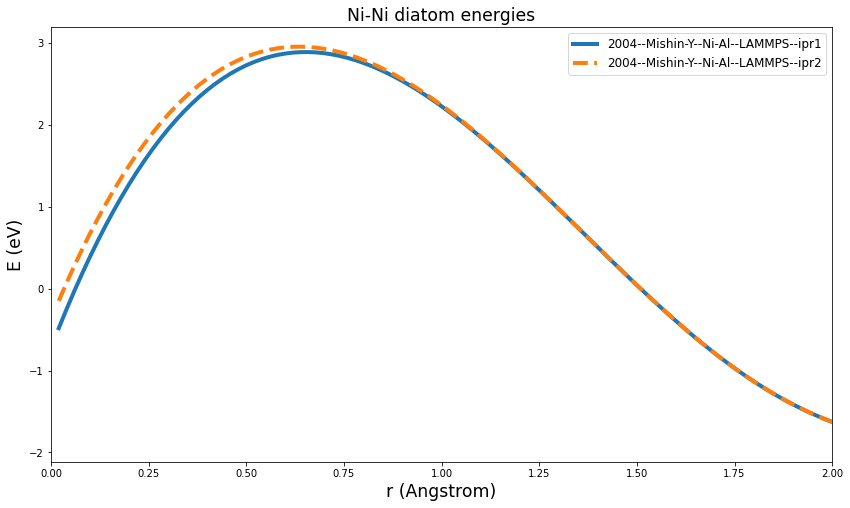

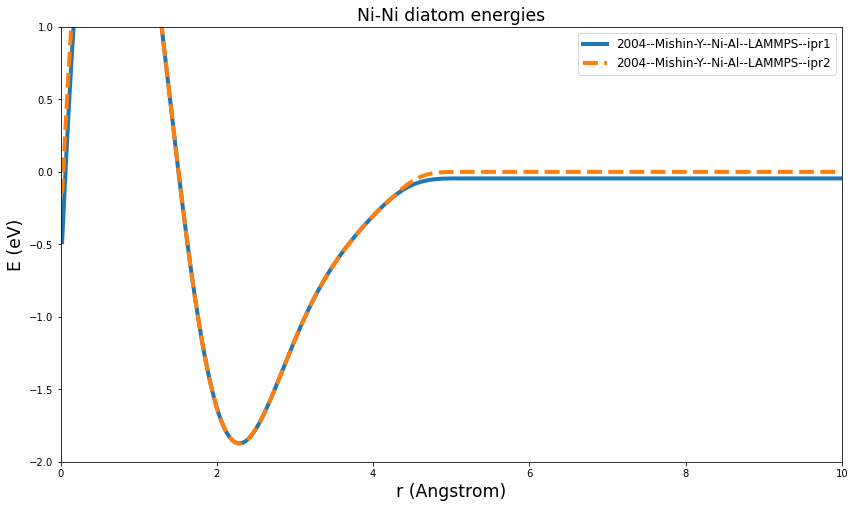

In [32]:
Ni_df = records_df[records_df.symbolstr == 'Ni'].sort_values('potential_LAMMPS_id')
assert len(Ni_df) == 2


plt.figure(figsize=(14,8))
plt.title('Ni-Ni diatom energies', size='xx-large')
plt.plot(Ni_df.iloc[0].diatom_plot.r, Ni_df.iloc[0].diatom_plot.energy, lw=4, label=Ni_df.iloc[0].potential_LAMMPS_id)
plt.plot(Ni_df.iloc[1].diatom_plot.r, Ni_df.iloc[1].diatom_plot.energy, '--', lw=4, label=Ni_df.iloc[1].potential_LAMMPS_id)
plt.legend(fontsize='large')
plt.xlim(0, 2)
plt.xlabel('r (Angstrom)', size='xx-large')
plt.ylabel('E (eV)', size='xx-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title('Ni-Ni diatom energies', size='xx-large')
plt.plot(Ni_df.iloc[0].diatom_plot.r, Ni_df.iloc[0].diatom_plot.energy, lw=4, label=Ni_df.iloc[0].potential_LAMMPS_id)
plt.plot(Ni_df.iloc[1].diatom_plot.r, Ni_df.iloc[1].diatom_plot.energy, '--', lw=4, label=Ni_df.iloc[1].potential_LAMMPS_id)
plt.legend(fontsize='large')
plt.xlim(0, 10)
plt.xlabel('r (Angstrom)', size='xx-large')
plt.ylabel('E (eV)', size='xx-large')
plt.ylim(-2, 1)
plt.show()

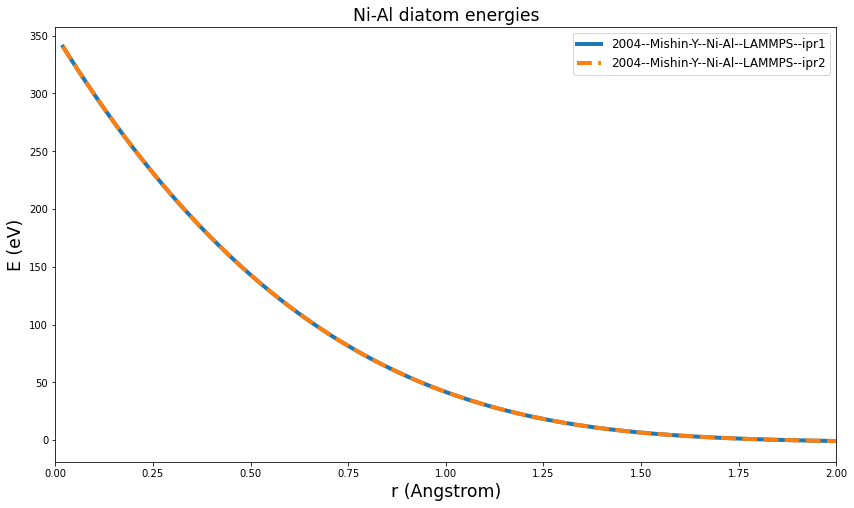

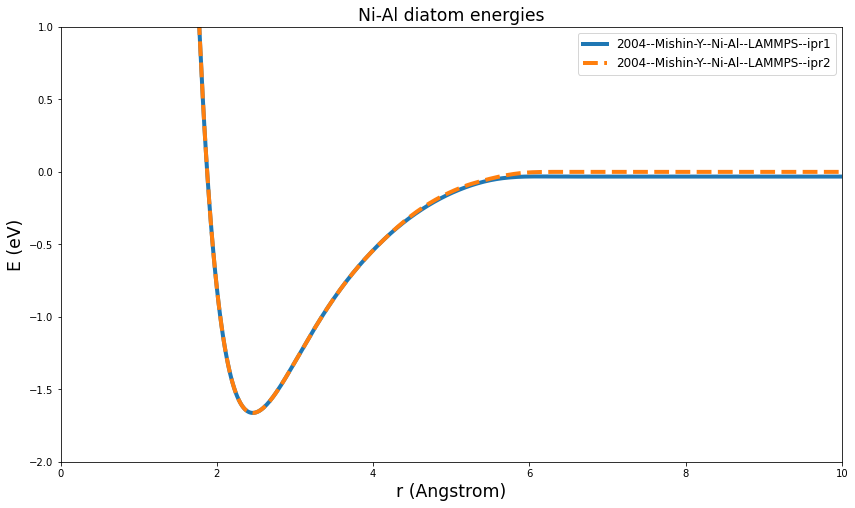

In [34]:
NiAl_df = records_df[records_df.symbolstr == 'Ni-Al'].sort_values('potential_LAMMPS_id')
assert len(NiAl_df) == 2


plt.figure(figsize=(14,8))
plt.title('Ni-Al diatom energies', size='xx-large')
plt.plot(NiAl_df.iloc[0].diatom_plot.r, NiAl_df.iloc[0].diatom_plot.energy, lw=4, label=NiAl_df.iloc[0].potential_LAMMPS_id)
plt.plot(NiAl_df.iloc[1].diatom_plot.r, NiAl_df.iloc[1].diatom_plot.energy, '--', lw=4, label=NiAl_df.iloc[1].potential_LAMMPS_id)
plt.legend(fontsize='large')
plt.xlim(0, 2)
plt.xlabel('r (Angstrom)', size='xx-large')
plt.ylabel('E (eV)', size='xx-large')
plt.show()

plt.figure(figsize=(14,8))
plt.title('Ni-Al diatom energies', size='xx-large')
plt.plot(NiAl_df.iloc[0].diatom_plot.r, NiAl_df.iloc[0].diatom_plot.energy, lw=4, label=NiAl_df.iloc[0].potential_LAMMPS_id)
plt.plot(NiAl_df.iloc[1].diatom_plot.r, NiAl_df.iloc[1].diatom_plot.energy, '--', lw=4, label=NiAl_df.iloc[1].potential_LAMMPS_id)
plt.legend(fontsize='large')
plt.xlim(0, 10)
plt.xlabel('r (Angstrom)', size='xx-large')
plt.ylabel('E (eV)', size='xx-large')
plt.ylim(-2, 1)
plt.show()

## E_vs_r_scans

In [36]:
records_df = database.get_records_df(style='calculation_E_vs_r_scan', potential_id='2004--Mishin-Y--Ni-Al')

In [37]:
records_df['symbolstr'] = records_df.apply(symbolstr, axis=1)

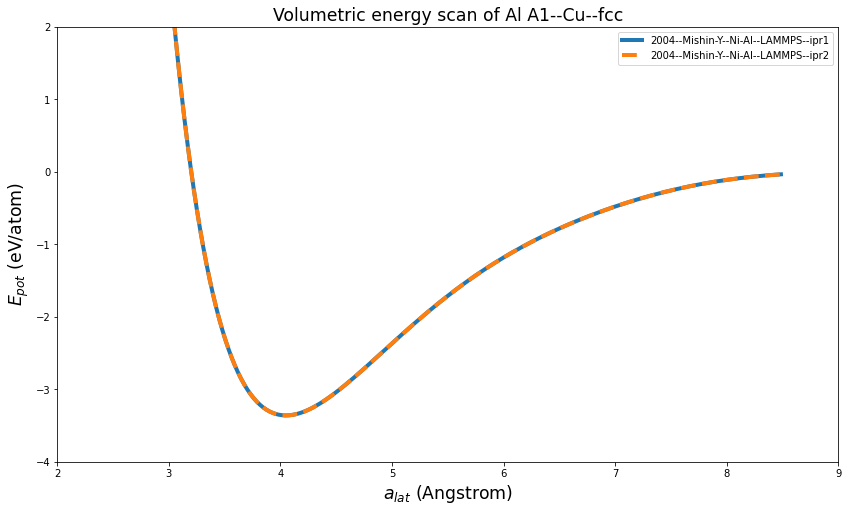

In [49]:
elements = 'Al'
structure = 'A1--Cu--fcc'

matches = records_df[(records_df.symbolstr == elements) & (records_df.family == structure)].sort_values('potential_LAMMPS_id')

plt.figure(figsize=(14,8))
plt.title(f'Volumetric energy scan of {elements} {structure}', size='xx-large')
plt.plot(matches.iloc[0].e_vs_r_plot.a, matches.iloc[0].e_vs_r_plot.E_coh, lw=4, label=matches.iloc[0].potential_LAMMPS_id)
plt.plot(matches.iloc[1].e_vs_r_plot.a, matches.iloc[1].e_vs_r_plot.E_coh, '--', lw=4, label=matches.iloc[1].potential_LAMMPS_id)
plt.legend()
plt.xlim(2, 9)
plt.ylim(-4, 2)
plt.xlabel('$a_{lat}$ (Angstrom)', size='xx-large')
plt.ylabel('$E_{pot}$ (eV/atom)', size='xx-large')
plt.show()
    

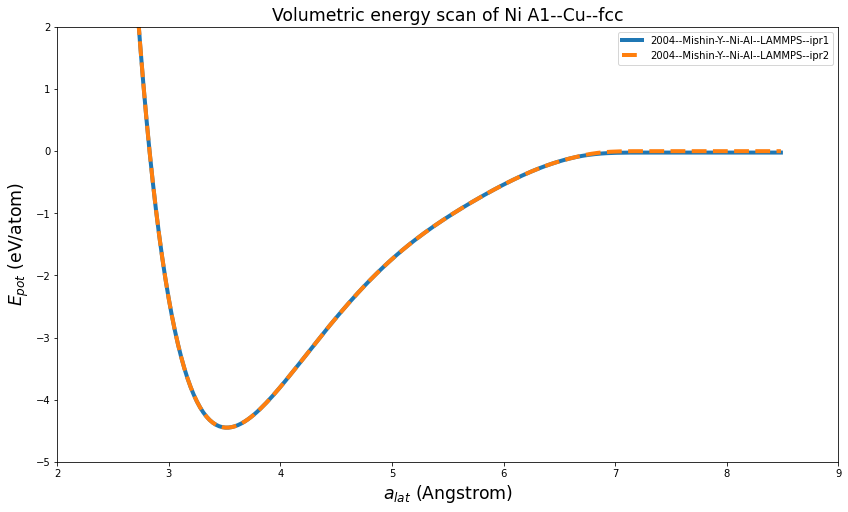

In [50]:
elements = 'Ni'
structure = 'A1--Cu--fcc'

matches = records_df[(records_df.symbolstr == elements) & (records_df.family == structure)].sort_values('potential_LAMMPS_id')

plt.figure(figsize=(14,8))
plt.title(f'Volumetric energy scan of {elements} {structure}', size='xx-large')
plt.plot(matches.iloc[0].e_vs_r_plot.a, matches.iloc[0].e_vs_r_plot.E_coh, lw=4, label=matches.iloc[0].potential_LAMMPS_id)
plt.plot(matches.iloc[1].e_vs_r_plot.a, matches.iloc[1].e_vs_r_plot.E_coh, '--', lw=4, label=matches.iloc[1].potential_LAMMPS_id)
plt.legend()
plt.xlim(2, 9)
plt.ylim(-5, 2)
plt.xlabel('$a_{lat}$ (Angstrom)', size='xx-large')
plt.ylabel('$E_{pot}$ (eV/atom)', size='xx-large')
plt.show()
    

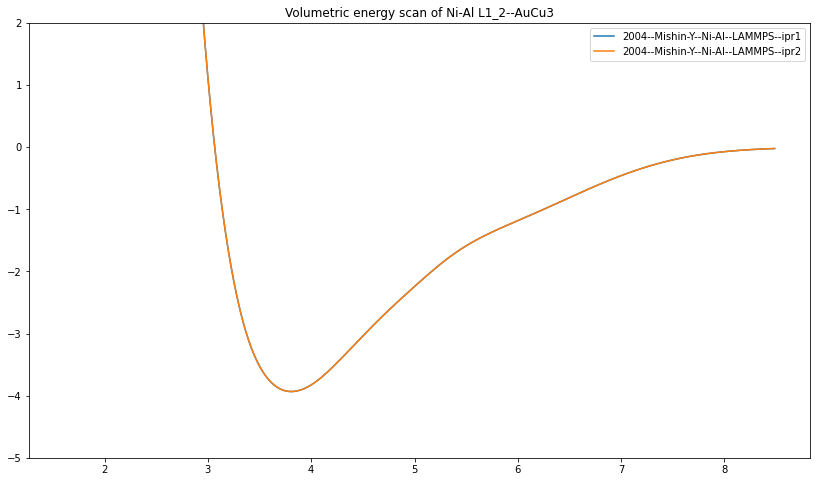

In [177]:
elements = 'Ni-Al'
structure = 'L1_2--AuCu3'

matches = records_df[(records_df.symbolstr == elements) & (records_df.family == structure)].sort_values('potential_LAMMPS_id')

plt.figure(figsize=(14,8))
plt.title(f'Volumetric energy scan of {elements} {structure}')
for i in range(len(matches)):
    match = matches.iloc[i]
    plt.plot(match.e_vs_r_plot.a, match.e_vs_r_plot.E_coh, label=match.potential_LAMMPS_id)
plt.legend()
plt.ylim(-5, 2)
plt.show()
    

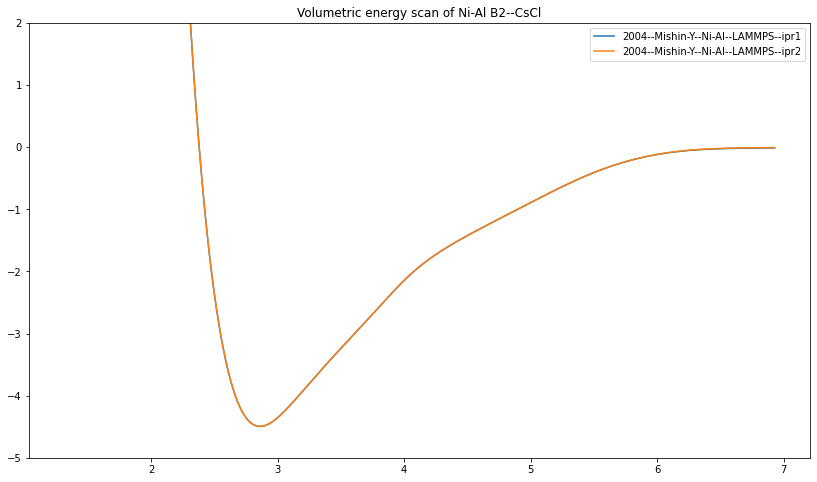

In [179]:
elements = 'Ni-Al'
structure = 'B2--CsCl'

matches = records_df[(records_df.symbolstr == elements) & (records_df.family == structure)].sort_values('potential_LAMMPS_id')

plt.figure(figsize=(14,8))
plt.title(f'Volumetric energy scan of {elements} {structure}')
for i in range(len(matches)):
    match = matches.iloc[i]
    plt.plot(match.e_vs_r_plot.a, match.e_vs_r_plot.E_coh, label=match.potential_LAMMPS_id)
plt.legend()
plt.ylim(-5, 2)
plt.show()
    

## Structures

In [85]:
records_df = database.get_records_df(style='calculation_relax_static', potential_id='2004--Mishin-Y--Ni-Al',
                                     branch='main', status='finished')
records_df['symbolstr'] = records_df.apply(symbolstr, axis=1)

In [86]:
def alat(series):
    return series.lx / 1
records_df['alat'] = records_df.apply(alat, axis=1)




In [87]:
E_Al = -3.36000002259075 
E_Ni = -4.44999998517825

In [88]:
showkeys = ['potential_LAMMPS_id', 'symbolstr', 'family', 'alat', 'E_cohesive', 'ΔE']
sortkeys = ['family', 'potential_LAMMPS_id']
families = ['A1--Cu--fcc', 'A2--W--bcc', 'A3--Mg--hcp', 'A4--C--dc', 'Ah--alpha-Po--sc']

In [89]:
def ΔE(series):
    return series.E_cohesive - E_Al
records_df['ΔE'] = records_df.apply(ΔE, axis=1)

records_df[(records_df.symbolstr == 'Al')
           &(records_df.family.isin(families))
          ].sort_values(sortkeys)[showkeys]

,potential_LAMMPS_id,symbolstr,family,alat,E_cohesive,ΔE
16,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al,A1--Cu--fcc,4.050000,-3.360000,0.000000
21,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al,A1--Cu--fcc,4.050000,-3.360000,0.000000
43,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al,A2--W--bcc,3.235530,-3.267383,0.092617
81,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al,A2--W--bcc,3.235530,-3.267383,0.092617
139,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al,A3--Mg--hcp,2.835744,-3.338431,0.021569
60,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al,A3--Mg--hcp,2.835744,-3.338431,0.021569
147,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al,A4--C--dc,5.631565,-2.475829,0.884171
62,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al,A4--C--dc,5.631565,-2.475829,0.884171
54,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al,Ah--alpha-Po--sc,2.725776,-3.063389,0.296611
1,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al,Ah--alpha-Po--sc,2.725776,-3.063389,0.296611


In [90]:
print(records_df.loc[16].alat)
print(records_df.loc[21].alat)
print()
print(records_df.loc[16].E_cohesive)
print(records_df.loc[21].E_cohesive)
print()

4.049999839013269
4.049999839012033

-3.36000002259075
-3.36000002259075



In [91]:
print(records_df.loc[147].ΔE)
print(records_df.loc[62].ΔE)

0.8841709734133749
0.8841709734171252


In [92]:
records_df.loc[16].E_cohesive - -0.0098690015330354

-3.3501310210577144

In [93]:
def ΔE(series):
    return series.E_cohesive - -4.449999985170001
records_df['ΔE'] = records_df.apply(ΔE, axis=1)

records_df[(records_df.symbolstr == 'Ni')
           &(records_df.family.isin(families))
          ].sort_values(sortkeys)[showkeys]

,potential_LAMMPS_id,symbolstr,family,alat,E_cohesive,ΔE
59,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Ni,A1--Cu--fcc,3.520000,-4.450000,-8.249401e-12
137,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Ni,A1--Cu--fcc,3.520000,-4.450000,0.000000e+00
14,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Ni,A2--W--bcc,2.489016,-4.450000,5.551115e-12
150,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Ni,A2--W--bcc,2.768747,-4.382714,6.728585e-02
140,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Ni,A4--C--dc,5.222052,-3.033571,1.416429e+00
78,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Ni,A4--C--dc,5.222052,-3.033571,1.416429e+00
105,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Ni,Ah--alpha-Po--sc,2.396501,-3.726400,7.235998e-01
131,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Ni,Ah--alpha-Po--sc,2.396501,-3.726400,7.235998e-01


In [94]:
print(records_df.loc[59].alat)
print(records_df.loc[137].alat)
print()
print(records_df.loc[59].E_cohesive)
print(records_df.loc[137].E_cohesive)
print()

3.5200000306764094
3.52000003065715

-4.44999998517825
-4.449999985170001



In [95]:
print(records_df.loc[150].ΔE)
print(records_df.loc[131].ΔE)
print(records_df.loc[78].ΔE)

0.0672858484079013
0.7235998443870004
1.4164289733138755


In [96]:
-4.44999998517825 - -0.022549650154092004

-4.427450335024158

In [97]:
def E_f(series):
    return series.E_cohesive - (E_Al + 3 * E_Ni) / 4
records_df['E_f'] = records_df.apply(E_f, axis=1)

showkeys = ['potential_LAMMPS_id', 'symbolstr', 'family', 'alat', 'E_cohesive', 'E_f']
families = ['L1_2--AuCu3', 'D0_3--BiF3']

records_df[(records_df.symbolstr == 'Ni-Al')
           &(records_df.family.isin(families))
          ].sort_values(sortkeys)[showkeys]

,potential_LAMMPS_id,symbolstr,family,alat,E_cohesive,E_f
18,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Ni-Al,D0_3--BiF3,5.881522,-3.867474,0.310026
104,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Ni-Al,D0_3--BiF3,5.881522,-3.867474,0.310026
79,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Ni-Al,L1_2--AuCu3,3.807335,-3.933673,0.243827
48,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Ni-Al,L1_2--AuCu3,3.807335,-3.933673,0.243827


In [98]:
def E_f(series):
    return series.E_cohesive - (E_Al + 3 * E_Ni) / 4
records_df['E_f'] = records_df.apply(E_f, axis=1)

showkeys = ['potential_LAMMPS_id', 'symbolstr', 'family', 'alat', 'E_cohesive', 'E_f']
families = ['L1_2--AuCu3', 'D0_3--BiF3']

records_df[(records_df.symbolstr == 'Al-Ni')
           &(records_df.family.isin(families))
          ].sort_values(sortkeys)[showkeys]

,potential_LAMMPS_id,symbolstr,family,alat,E_cohesive,E_f
112,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al-Ni,D0_3--BiF3,5.607183,-4.613121,-0.435621
152,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al-Ni,D0_3--BiF3,5.607183,-4.613121,-0.435621
45,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al-Ni,L1_2--AuCu3,3.571365,-4.625220,-0.447720
11,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al-Ni,L1_2--AuCu3,3.571365,-4.625220,-0.447720


In [99]:
print(records_df.loc[112].E_f)
print(records_df.loc[152].E_f)
print(records_df.loc[45].E_f)
print(records_df.loc[11].E_f)

-0.43562086571856184
-0.43562086573306225
-0.447719894081124
-0.4477198940831242


In [101]:
def E_f(series):
    return series.E_cohesive - (E_Al + E_Ni) / 2
records_df['E_f'] = records_df.apply(E_f, axis=1)

showkeys = ['potential_LAMMPS_id', 'symbolstr', 'family', 'alat', 'E_cohesive', 'E_f']
families = ['B1--NaCl--rock-salt', 'B2--CsCl', 'L1_0--AuCu']

records_df[(records_df.symbolstr == 'Al-Ni')
           &(records_df.family.isin(families))
          ].sort_values(sortkeys)[showkeys]

,potential_LAMMPS_id,symbolstr,family,alat,E_cohesive,E_f
0,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al-Ni,B1--NaCl--rock-salt,5.025598,-3.845424,0.059576
125,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al-Ni,B1--NaCl--rock-salt,5.025598,-3.845424,0.059576
2,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al-Ni,B2--CsCl,2.861924,-4.495420,-0.590420
143,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al-Ni,B2--CsCl,2.861924,-4.495420,-0.590420
111,2004--Mishin-Y--Ni-Al--LAMMPS--ipr1,Al-Ni,L1_0--AuCu,2.861924,-4.495420,-0.590420
127,2004--Mishin-Y--Ni-Al--LAMMPS--ipr2,Al-Ni,L1_0--AuCu,2.861924,-4.495420,-0.590420


In [102]:
print(records_df.loc[0].E_f)
print(records_df.loc[125].E_f)
print(records_df.loc[2].E_f)
print(records_df.loc[143].E_f)
print(records_df.loc[111].E_f)
print(records_df.loc[127].E_f)

0.059576049502374495
0.05957604949562478
-0.5904200463290001
-0.5904200463394496
-0.5904200463351996
-0.5904200463311495


## Cij

In [76]:
import atomman as am
import atomman.unitconvert as uc

In [77]:
Ni_ucell = am.load('prototype', 'A1--Cu--fcc', remote=False, a=3.5200000306764094, symbols='Ni')
Al_ucell = am.load('prototype', 'A1--Cu--fcc', remote=False, a=4.049999839013269, symbols='Al')

In [78]:
calculation = iprPy.load_calculation('elastic_constants_static')

In [79]:
potential = am.load_lammps_potential('2004--Mishin-Y--Ni-Al--LAMMPS--ipr1', remote=False)

In [80]:
Ni_cij = calculation.calc('lmp_mpi', Ni_ucell.supersize(3,3,3), potential)

In [81]:
Al_cij = calculation.calc('lmp_mpi', Al_ucell.supersize(3,3,3), potential)

In [82]:
print('Ni:')
print('C11', uc.get_in_units(Ni_cij['C'].Cij[0,0], 'GPa'))
print('C12', uc.get_in_units(Ni_cij['C'].Cij[0,1], 'GPa'))
print('C44', uc.get_in_units(Ni_cij['C'].Cij[3,3], 'GPa'))
print()

print('Al:')
print('C11', uc.get_in_units(Al_cij['C'].Cij[0,0], 'GPa'))
print('C12', uc.get_in_units(Al_cij['C'].Cij[0,1], 'GPa'))
print('C44', uc.get_in_units(Al_cij['C'].Cij[3,3], 'GPa'))

Ni:
C11 241.34257190475998
C12 150.82443510343498
C44 127.344652140085

Al:
C11 116.80747014889499
C12 60.11308925209276
C44 31.6566980163005


In [103]:
Ni3Al_ucell = am.load('prototype', 'L1_2--AuCu3', remote=False, a=3.57136542192042, symbols=['Al', 'Ni'])
print(Ni3Al_ucell)

avect =  [ 3.571,  0.000,  0.000]
bvect =  [ 0.000,  3.571,  0.000]
cvect =  [ 0.000,  0.000,  3.571]
origin = [ 0.000,  0.000,  0.000]
natoms = 4
natypes = 2
symbols = ('Al', 'Ni')
pbc = [ True  True  True]
per-atom properties = ['atype', 'pos']
     id |   atype |  pos[0] |  pos[1] |  pos[2]
      0 |       1 |   0.000 |   0.000 |   0.000
      1 |       2 |   0.000 |   1.786 |   1.786
      2 |       2 |   1.786 |   0.000 |   1.786
      3 |       2 |   1.786 |   1.786 |   0.000


In [104]:
Ni3Al_cij = calculation.calc('lmp_mpi', Ni3Al_ucell.supersize(3,3,3), potential)
print('C11', uc.get_in_units(Ni3Al_cij['C'].Cij[0,0], 'GPa'))
print('C12', uc.get_in_units(Ni3Al_cij['C'].Cij[0,1], 'GPa'))
print('C44', uc.get_in_units(Ni3Al_cij['C'].Cij[3,3], 'GPa'))

C11 236.00496602572997
C12 154.3015602474975
C44 127.06346124902501


## Surfaces

In [105]:
calculation = iprPy.load_calculation('surface_energy_static')

In [106]:
Ni_110 = calculation.calc('lmp_mpi', Ni_ucell, potential, [1,1,0], sizemults=[3,3,8], ftol=1e-8)
Ni_100 = calculation.calc('lmp_mpi', Ni_ucell, potential, [1,0,0], sizemults=[3,3,8], ftol=1e-8)
Ni_111 = calculation.calc('lmp_mpi', Ni_ucell, potential, [1,1,1], sizemults=[3,3,8], ftol=1e-8)
Al_110 = calculation.calc('lmp_mpi', Al_ucell, potential, [1,1,0], sizemults=[3,3,8], ftol=1e-8)
Al_100 = calculation.calc('lmp_mpi', Al_ucell, potential, [1,0,0], sizemults=[3,3,8], ftol=1e-8)
Al_111 = calculation.calc('lmp_mpi', Al_ucell, potential, [1,1,1], sizemults=[3,3,8], ftol=1e-8)

In [107]:
print('Ni')
print('(110)', uc.get_in_units(Ni_110['E_surf_f'], 'mJ/m^2'))
print('(100)', uc.get_in_units(Ni_100['E_surf_f'], 'mJ/m^2'))
print('(111)', uc.get_in_units(Ni_111['E_surf_f'], 'mJ/m^2'))
print()

print('Al')
print('(110)', uc.get_in_units(Al_110['E_surf_f'], 'mJ/m^2'))
print('(100)', uc.get_in_units(Al_100['E_surf_f'], 'mJ/m^2'))
print('(111)', uc.get_in_units(Al_111['E_surf_f'], 'mJ/m^2'))

Ni
(110) 2087.0767707057043
(100) 1936.0355765428644
(111) 1759.0961604598424

Al
(110) 792.6281192121613
(100) 607.0608079981145
(111) 601.2014168517616


In [74]:
records_df = database.get_records_df(style='calculation_elastic_constants_static', potential_id='2004--Mishin-Y--Ni-Al',
                                     status='finished')

In [75]:
records_df

""
